<h1>Lab 03</h1>
<h4>Name : Ambalia Harshit</h4>
<h4>Roll No. : MT001</h4>

<h3>AIM : Introduction to linear regression</h3>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Lab04_data.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

Preprocessing DATA

In [6]:
# Handling missing values
def handle_missing_column_using_average(df, column_name):
    df[column_name] = df[column_name].replace(to_replace='.*\?.*', value=np.nan, regex=True)

    missing_indices = df[df[column_name].isnull()].index
    non_missing_indices = df[df[column_name].notnull()].index

    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    df[column_name] = df[column_name].astype(float)

    if len(missing_indices) < len(non_missing_indices):
        column_mean = df.loc[non_missing_indices, column_name].mean()
        df[column_name] = df[column_name].fillna(column_mean)
    else:
        print('Dropping the column')
        df = df.drop(columns=[column_name])

    return df

In [7]:
import numpy as np

handle_missing_from = ['horsepower']
for column_name in handle_missing_from:
    df = handle_missing_column_using_average(df, column_name)
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1      

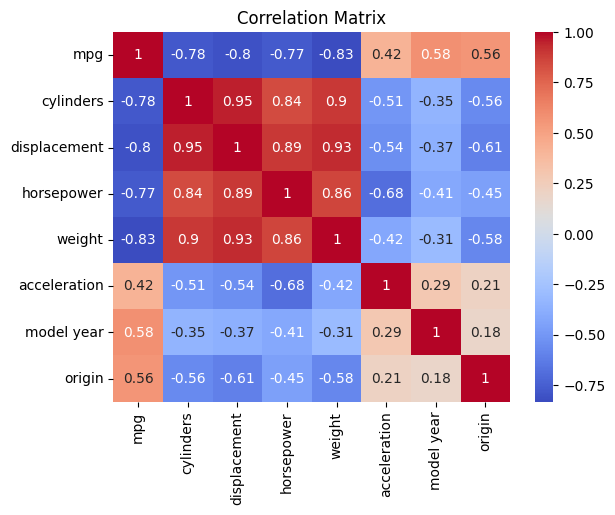

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Dropping highly corelated data
corr = df.corr()
corr.head()

<ipython-input-11-4dee574d0fa4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024


In [12]:
threshold = 0.9

# Find highly correlated pairs
correlated_pairs = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname_i = corr.columns[i]
            colname_j = corr.columns[j]
            correlated_pairs.add((colname_i, colname_j))

In [13]:
print(correlated_pairs)
for col1, col2 in correlated_pairs:
    df = df.drop(col2, axis=1)

{('weight', 'displacement'), ('displacement', 'cylinders')}


In [15]:
# Performing Label encoding
from sklearn.preprocessing import LabelEncoder
def perform_encoding(df, column_name):
    label_encoder = LabelEncoder()
    df[column_name] = label_encoder.fit_transform(df[column_name])
    return df

In [16]:
column_name = ["origin", 'model year']
for col in column_name:
    df = perform_encoding(df, col)
print(df)

      mpg  horsepower  weight  acceleration  model year  origin  \
0    18.0       130.0    3504          12.0           0       0   
1    15.0       165.0    3693          11.5           0       0   
2    18.0       150.0    3436          11.0           0       0   
3    16.0       150.0    3433          12.0           0       0   
4    17.0       140.0    3449          10.5           0       0   
..    ...         ...     ...           ...         ...     ...   
393  27.0        86.0    2790          15.6          12       0   
394  44.0        52.0    2130          24.6          12       1   
395  32.0        84.0    2295          11.6          12       0   
396  28.0        79.0    2625          18.6          12       0   
397  31.0        82.0    2720          19.4          12       0   

                      car name  
0    chevrolet chevelle malibu  
1            buick skylark 320  
2           plymouth satellite  
3                amc rebel sst  
4                  ford torino

In [17]:
df = df.drop('car name', axis=1)

In [18]:
print(df)

      mpg  horsepower  weight  acceleration  model year  origin
0    18.0       130.0    3504          12.0           0       0
1    15.0       165.0    3693          11.5           0       0
2    18.0       150.0    3436          11.0           0       0
3    16.0       150.0    3433          12.0           0       0
4    17.0       140.0    3449          10.5           0       0
..    ...         ...     ...           ...         ...     ...
393  27.0        86.0    2790          15.6          12       0
394  44.0        52.0    2130          24.6          12       1
395  32.0        84.0    2295          11.6          12       0
396  28.0        79.0    2625          18.6          12       0
397  31.0        82.0    2720          19.4          12       0

[398 rows x 6 columns]


In [13]:
# # Performing Scaling
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()

In [14]:
# # As we're dropping the column, If that column would be in there dataframe or not.
# scaler = MinMaxScaler()
# rows = ['horsepower', 'weight', 'acceleration']
# header_values = df.columns
# print(header_values)
# for column in rows:
#     if column in header_values:
#         scaler.fit(df[rows])
#         df[rows] = scaler.transform(df[rows])

In [19]:
output_filename = "Processed-Data.csv"
df.to_csv(output_filename, index=False)

Model 01 - Simple Data

In [20]:
df = pd.read_csv('/content/Processed-Data.csv')
print(df.columns)

Index(['mpg', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'], dtype='object')


In [21]:
data = df[['horsepower', 'weight', 'acceleration', 'model year', 'origin']]
labels = df[['mpg']]
print(data)
print(labels)

     horsepower  weight  acceleration  model year  origin
0         130.0    3504          12.0           0       0
1         165.0    3693          11.5           0       0
2         150.0    3436          11.0           0       0
3         150.0    3433          12.0           0       0
4         140.0    3449          10.5           0       0
..          ...     ...           ...         ...     ...
393        86.0    2790          15.6          12       0
394        52.0    2130          24.6          12       1
395        84.0    2295          11.6          12       0
396        79.0    2625          18.6          12       0
397        82.0    2720          19.4          12       0

[398 rows x 5 columns]
      mpg
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
..    ...
393  27.0
394  44.0
395  32.0
396  28.0
397  31.0

[398 rows x 1 columns]


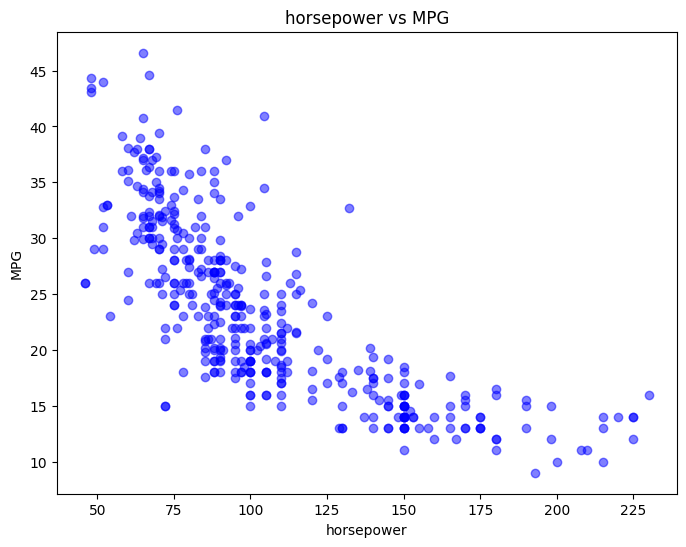

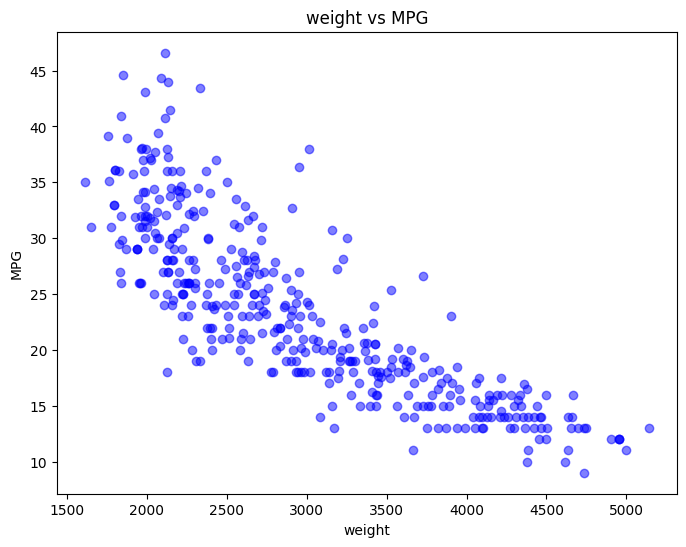

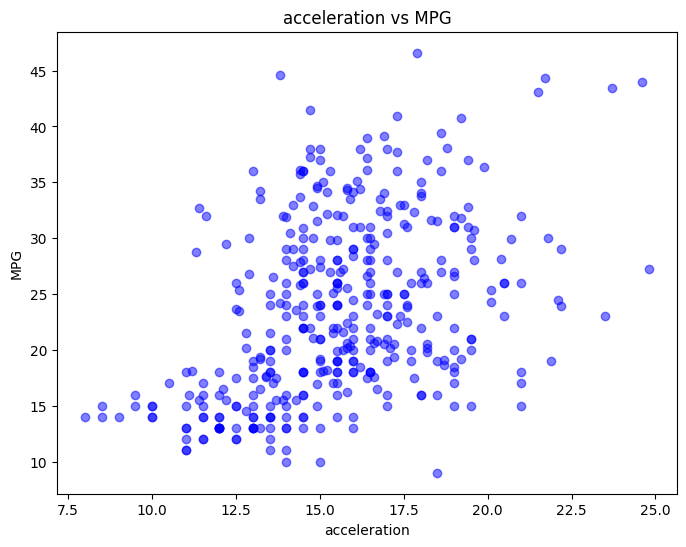

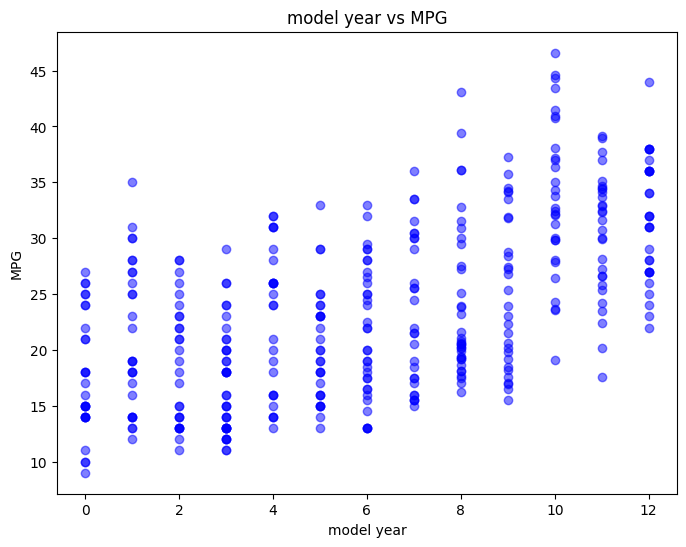

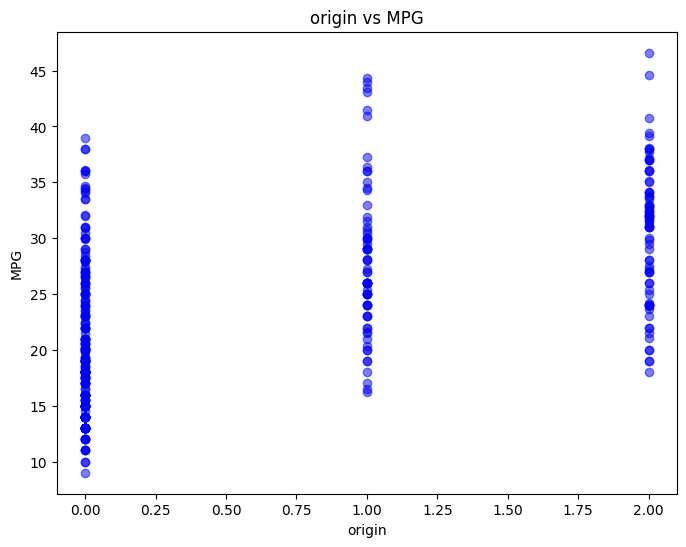

In [22]:
data = df[['horsepower', 'weight', 'acceleration', 'model year', 'origin']]
labels = df[['mpg']]

for feature in data.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], labels, color='blue', alpha=0.5)
    plt.title(f'{feature} vs MPG')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.show()

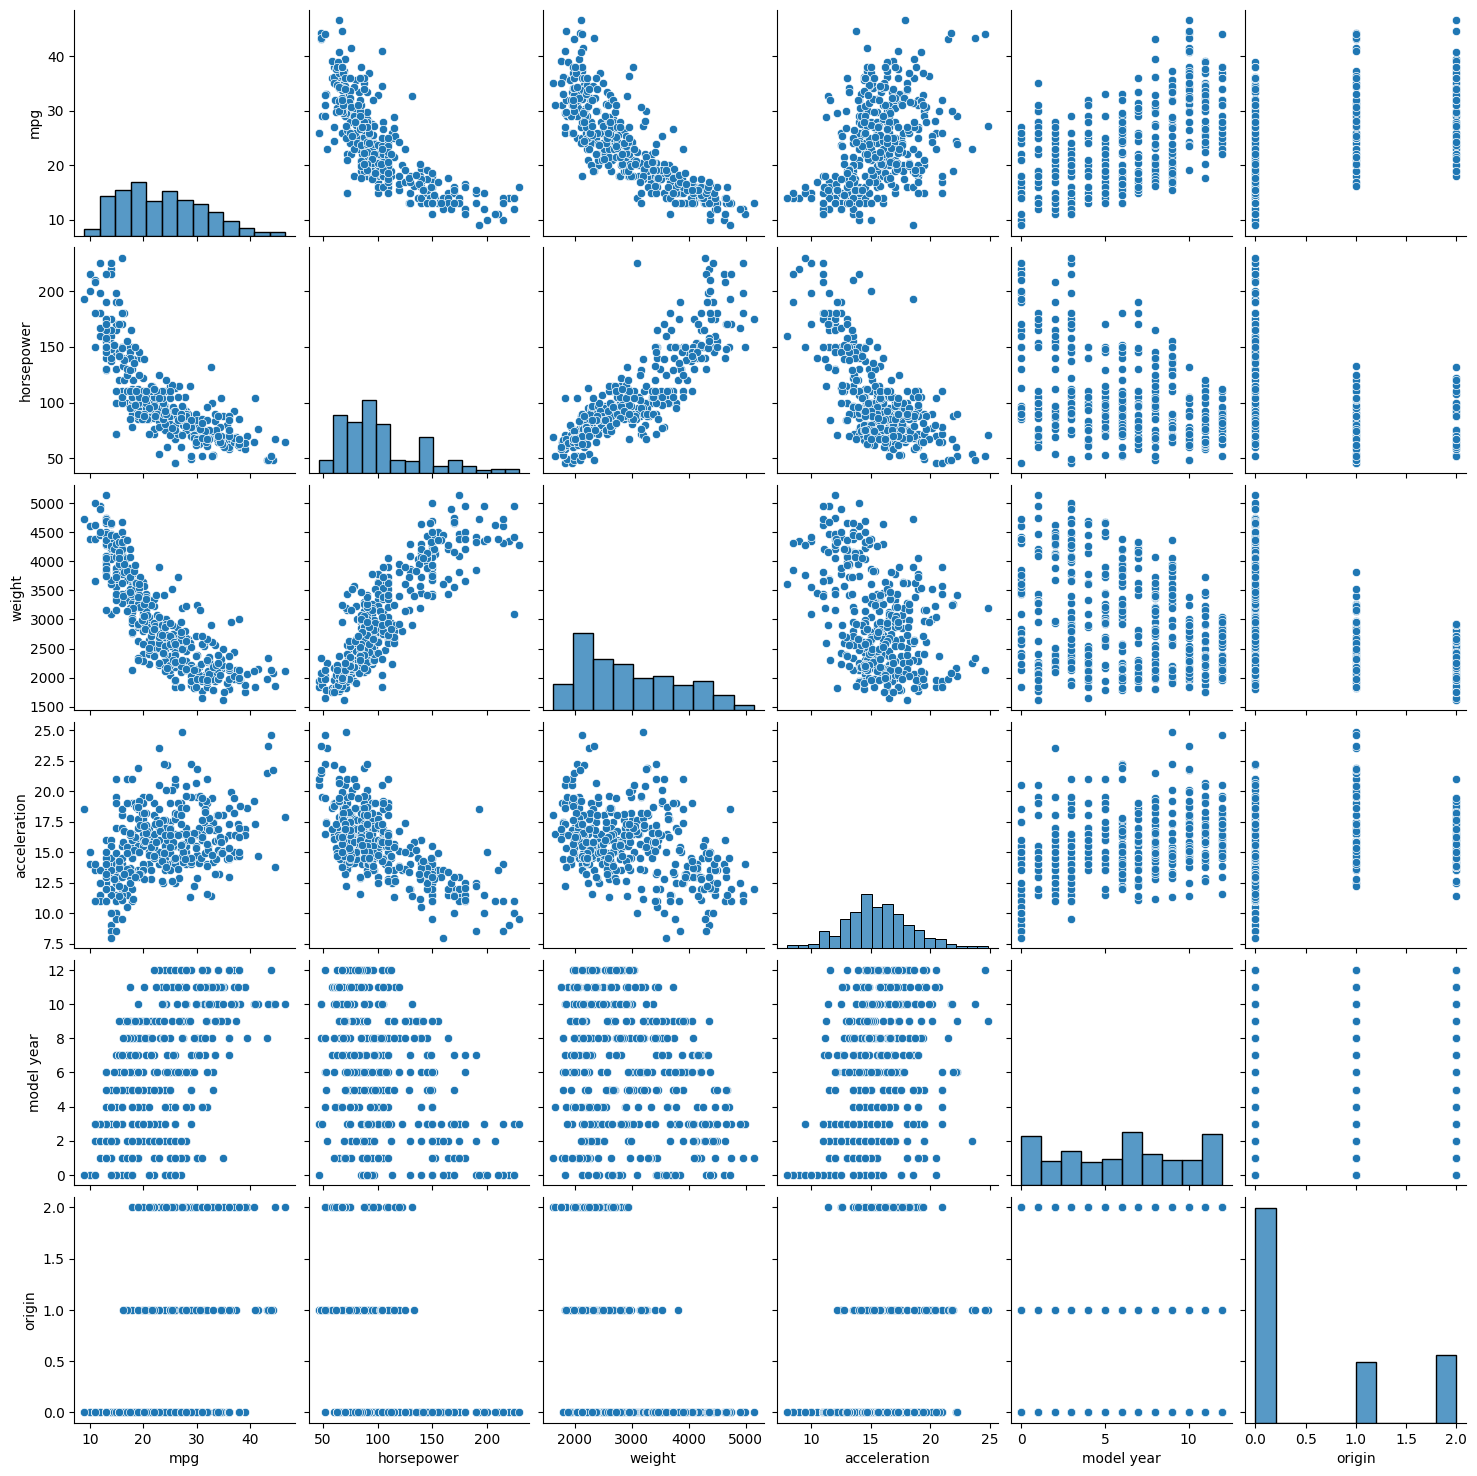

In [23]:
sns.pairplot(df[['mpg', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']])
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
my_model_m1 = LinearRegression()
my_model_m1.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = my_model_m1.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print("Mean squared error:", mse)

Mean squared error: mpg    8.505496
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


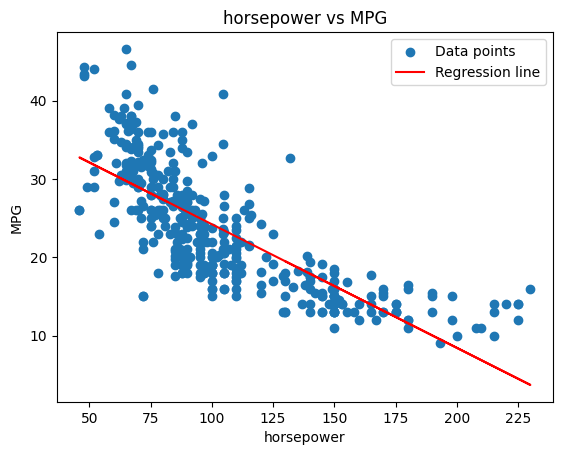

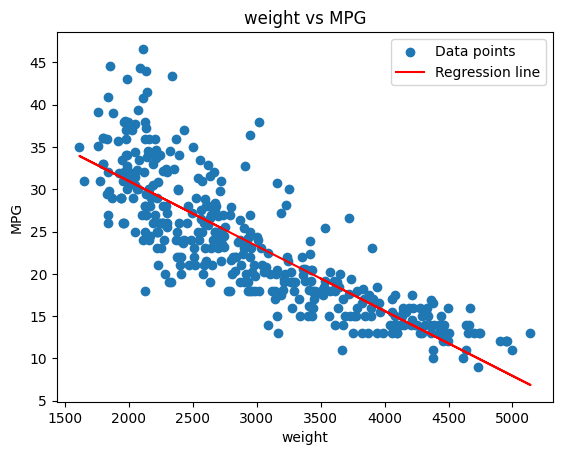

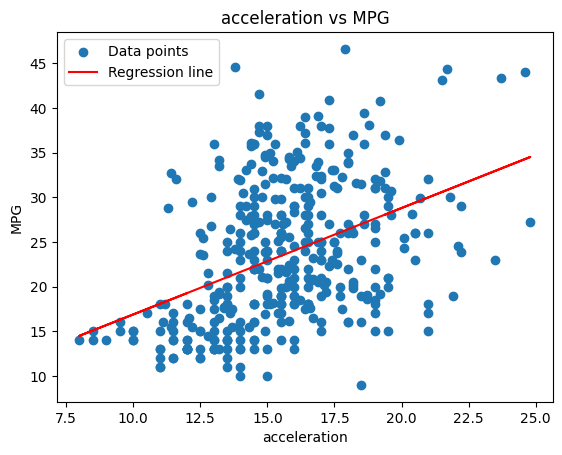

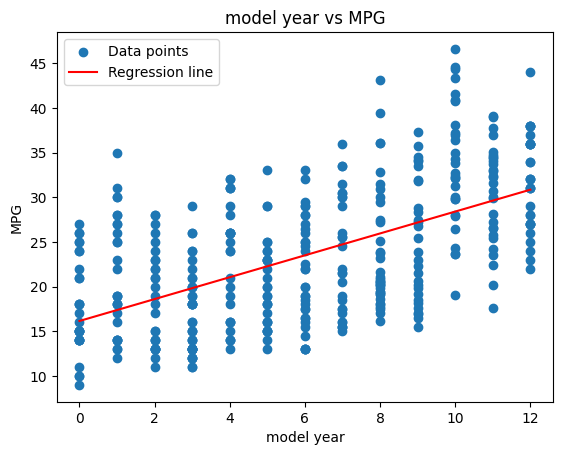

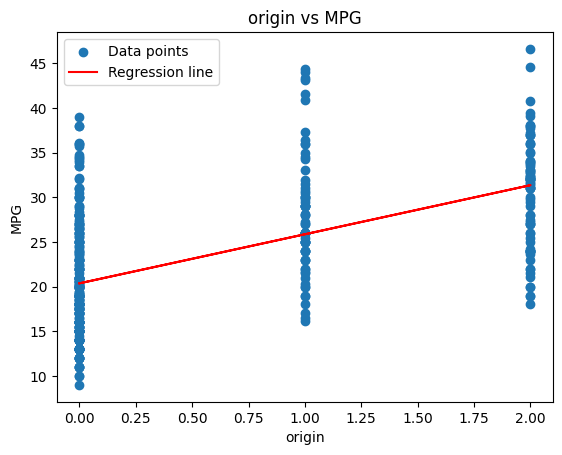

In [43]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

columns = ['horsepower', 'weight', 'acceleration', 'model year', 'origin']
for feature in columns:
    # Extract the feature values and convert to 2D array
    x = data[[feature]].values
    y = labels.values

    # Create and fit the model
    model = LinearRegression()
    model.fit(x, y)

    # Make predictions
    predictions = model.predict(x)

    # Plot the data points
    plt.scatter(x, y, label='Data points')
    # Plot the regression line
    plt.plot(x, predictions, color='red', label='Regression line')

    plt.title(f'{feature} vs MPG')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()
    plt.show()

In [44]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [45]:
r2_score(y_test, y_pred)

0.8418066041153374

Model 02 - Ridge


In [61]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [62]:
ridge_model = Ridge(alpha=0.3)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.3)

In [63]:
y_pred = ridge_model.predict(X_test)
mse_ridge = np.mean((y_pred - y_test)**2)
print(f'MSE for ridge : {mse_ridge}')
print(f'r2 score for ridge : {r2_score(y_test, y_pred)}')

MSE for ridge : mpg    8.506101
dtype: float64
r2 score for ridge : 0.8417953499991837


In [76]:
ridge_coef = ridge_model.coef_
print(ridge_model.coef_)

[[-0.00377369 -0.00594452  0.03869659  0.78283053  1.09651712]]


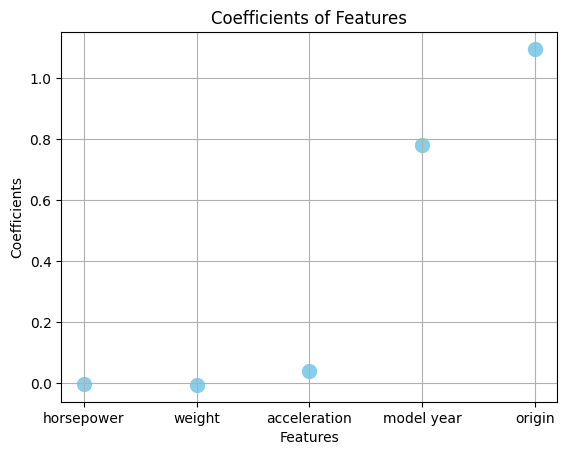

In [79]:
coef = ridge_coef
columns = ['horsepower', 'weight', 'acceleration', 'model year', 'origin']

# Create a scatter plot
plt.scatter(columns, coef[0], color='skyblue', s=100)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')
plt.grid(True)

Model 03 - Lasso

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [66]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [70]:
y_pred = lasso_model.predict(X_test)
y_pred_padded = np.pad(y_pred, (0, len(y_test) - len(y_pred)))
# mse_lasso = np.mean((y_pred_padded - y_test)**2)
# print(f'MSE for lasso : {mse_lasso}')
print(f'r2 score for lasso : {r2_score(y_test, y_pred)}')

r2 score for lasso : 0.8401340189419017


In [83]:
lasso_coef = lasso_model.coef_
print(lasso_model.coef_)

[-0.0052013  -0.0060566   0.01593275  0.77587809  0.87043473]


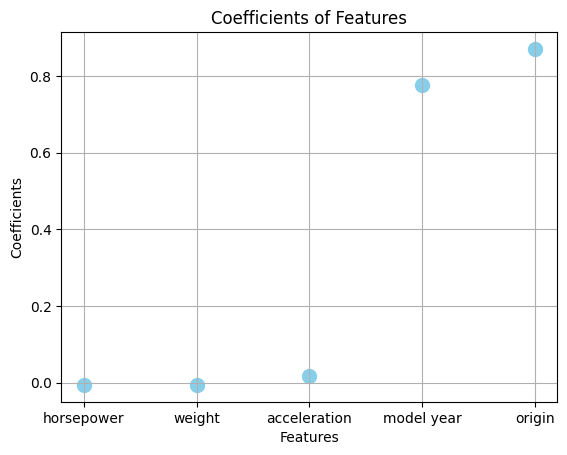

In [84]:
coef = [lasso_coef]
columns = ['horsepower', 'weight', 'acceleration', 'model year', 'origin']

# Create a scatter plot
plt.scatter(columns, coef[0], color='skyblue', s=100)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')
plt.grid(True)